___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import yfinance as yf

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [3]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [4]:

BAC = yf.download('BAC', start=start, end=end) # Bank of America
C   = yf.download('C',   start=start, end=end) # Citigroup
GS  = yf.download('GS',  start=start, end=end) # Goldman Sachs
JPM = yf.download('JPM', start=start, end=end) # JP Morgan Chase
MS  = yf.download('MS',  start=start, end=end) # Morgan Stanley
WFC = yf.download('WFC', start=start, end=end) # Wells Fargo


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
WFC

Price,Close,High,Low,Open,Volume
Ticker,WFC,WFC,WFC,WFC,WFC
Date,,,,,
2006-01-03,18.379148,18.422360,17.972964,18.206304,11016400
2006-01-04,18.165968,18.333050,18.070903,18.321527,10870000
2006-01-05,18.145809,18.180378,18.039221,18.148689,10158000
2006-01-06,18.252390,18.307124,18.082426,18.194775,8403800
2006-01-09,18.249508,18.335931,18.180371,18.249508,5619600
...,...,...,...,...,...
2015-12-24,41.133904,41.336497,41.051365,41.246456,4999400
2015-12-28,41.028843,41.103876,40.646166,40.931297,8288800


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [6]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [7]:
bank_stocks = yf.download(tickers, start=start, end=end, group_by='column')


[*********************100%***********************]  6 of 6 completed


In [8]:
bank_stocks.head()

Price           Close                                                          \
Ticker            BAC           C         GS        JPM         MS        WFC   
Date                                                                            
2006-01-03  30.660290  315.803589  93.850334  23.754633  31.349623  18.379148   
2006-01-04  30.334679  309.973175  92.554031  23.617529  31.371130  18.165968   
2006-01-05  30.373735  311.510864  92.517609  23.689062  31.457144  18.145809   
2006-01-06  30.328152  311.510864  93.828499  23.855970  31.489418  18.252390   
2006-01-09  30.347687  310.037109  94.957283  24.243439  31.822742  18.249508   

Price            High                                    ...       Open  \
Ticker            BAC           C         GS        JPM  ...         GS   
Date                                                     ...              
2006-01-03  30.725413  316.380220  94.265445  23.855114  ...  92.270020   
2006-01-04  30.764496  314.586260  93.879462  23.927502  ...  92.743379   
2006-01-05  30.497472  312.535977  92.721519  23.730789  ...  91.760222   
2006-01-06  30.549573  313.304831  94.127086  23.987113  ...  92.699705   
2006-01-09  30.588647  312.279577  95.124779  24.273246  ...  93.580880   

Price                                          Volume                    \
Ticker            JPM         MS        WFC       BAC        C       GS   
Date                                                                      
2006-01-03  23.541854  30.736715  18.206304  16296700  1537600  6188700   
2006-01-04  23.712905  31.559304  18.321527  17757900  1870960  4861600   
2006-01-05  23.611568  31.478650  18.148689  14970700  1143160  3717400   
2006-01-06  23.796359  31.596946  18.194775  12599800  1370210  4319600   
2006-01-09  23.772520  31.521667  18.249508  15619400  1680740  4723500   

Price                                    
Ticker           JPM       MS       WFC  
Date                                     
2006-01-03  12838600  5377000  11016400  
2006-01-04  13491500  7977800  10870000  
2006-01-05   8109400  5778000  10158000  
2006-01-06   7966900  6889800   8403800  
2006-01-09  16575200  4144500   5619600  

[5 rows x 30 columns]

** Set the column name levels (this is filled out for you):**

In [9]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

** Check the head of the bank_stocks dataframe.**

In [10]:
bank_stocks.head()

Bank Ticker      Close                                               \
Stock Info         BAC           C         GS        JPM         MS   
Date                                                                  
2006-01-03   30.660290  315.803589  93.850334  23.754633  31.349623   
2006-01-04   30.334679  309.973175  92.554031  23.617529  31.371130   
2006-01-05   30.373735  311.510864  92.517609  23.689062  31.457144   
2006-01-06   30.328152  311.510864  93.828499  23.855970  31.489418   
2006-01-09   30.347687  310.037109  94.957283  24.243439  31.822742   

Bank Ticker                  High                                    ...  \
Stock Info         WFC        BAC           C         GS        JPM  ...   
Date                                                                 ...   
2006-01-03   18.379148  30.725413  316.380220  94.265445  23.855114  ...   
2006-01-04   18.165968  30.764496  314.586260  93.879462  23.927502  ...   
2006-01-05   18.145809  30.497472  312.535977  92.721519  23.730789  ...   
2006-01-06   18.252390  30.549573  313.304831  94.127086  23.987113  ...   
2006-01-09   18.249508  30.588647  312.279577  95.124779  24.273246  ...   

Bank Ticker       Open                                     Volume           \
Stock Info          GS        JPM         MS        WFC       BAC        C   
Date                                                                         
2006-01-03   92.270020  23.541854  30.736715  18.206304  16296700  1537600   
2006-01-04   92.743379  23.712905  31.559304  18.321527  17757900  1870960   
2006-01-05   91.760222  23.611568  31.478650  18.148689  14970700  1143160   
2006-01-06   92.699705  23.796359  31.596946  18.194775  12599800  1370210   
2006-01-09   93.580880  23.772520  31.521667  18.249508  15619400  1680740   

Bank Ticker                                        
Stock Info        GS       JPM       MS       WFC  
Date                                               
2006-01-03   6188700  12838600  5377000  11016400  
2006-01-04   4861600  13491500  7977800  10870000  
2006-01-05   3717400   8109400  5778000  10158000  
2006-01-06   4319600   7966900  6889800   8403800  
2006-01-09   4723500  16575200  4144500   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [14]:
bank_stocks.xs(key='Close', axis=1, level=0).max()

Stock Info
BAC     37.078720
C      376.505249
GS     183.258789
JPM     52.850224
MS      49.144035
WFC     43.327557
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [15]:
returns = pd.DataFrame()
for tick in tickers:
     returns[tick + ' Return'] = bank_stocks.xs(key='Close', axis=1, level=0)[tick].pct_change()
    
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.005772,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000394,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001026,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010585,-0.000158


** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [16]:
returns = pd.DataFrame()
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks.xs(key='Close', axis=1, level=0)[tick].pct_change()

returns.head()
    


,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.005772,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000394,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001026,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010585,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

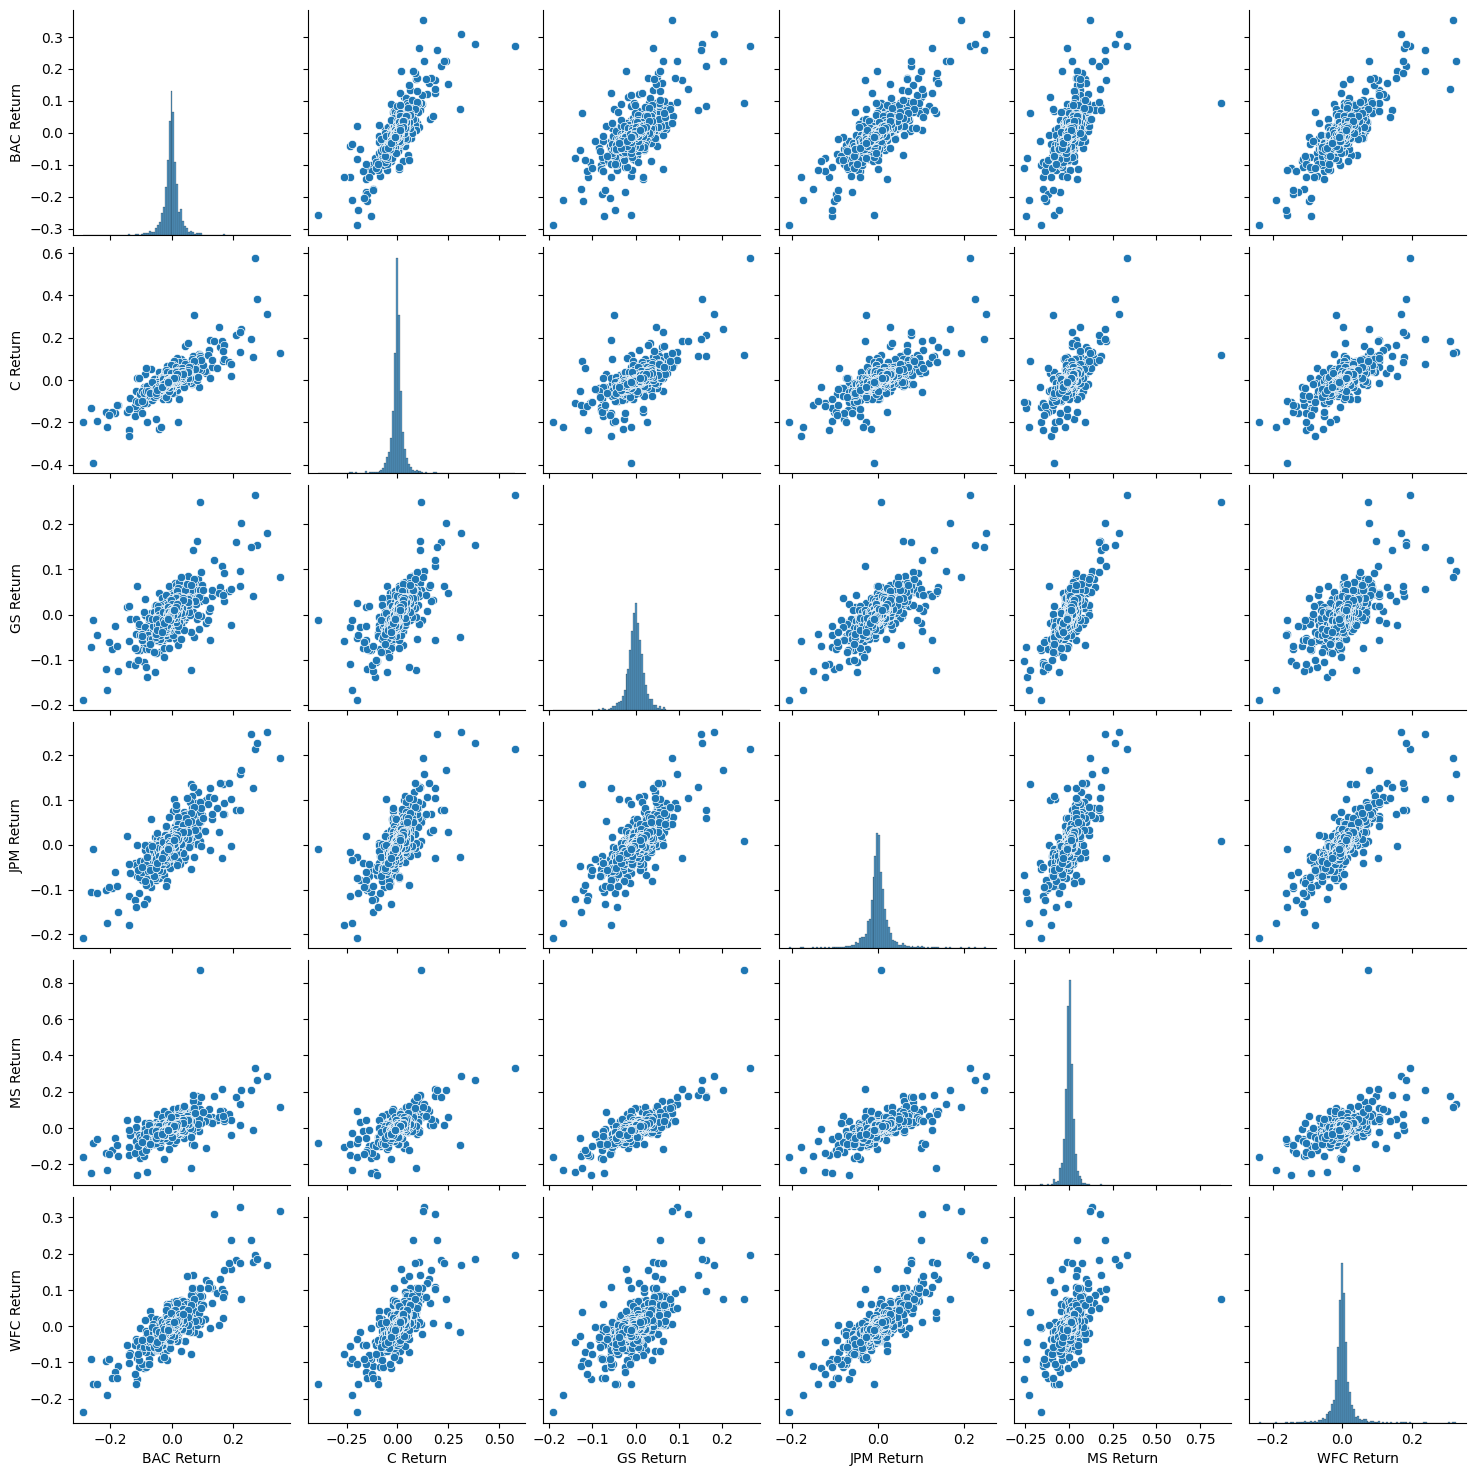

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use [1:] to skip the first row (the NaNs)
sns.pairplot(returns[1:])
plt.show()

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [19]:
# 1. Best Return Dates
print("--- Best Single Day Returns ---")
print(returns.idxmax())

--- Best Single Day Returns ---
BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]


** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [20]:
# 2. Worst Return Dates
print("\n--- Worst Single Day Returns ---")
print(returns.idxmin())


--- Worst Single Day Returns ---
BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]


** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [22]:
# Standard deviation for the entire period
returns.std()

BAC Return    0.036659
C Return      0.038672
GS Return     0.025386
JPM Return    0.027675
MS Return     0.037717
WFC Return    0.030195
dtype: float64

In [23]:
#Riskiest Stock (Year 2015/2016 Analysis)
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016174
C Return      0.015288
GS Return     0.014043
JPM Return    0.014006
MS Return     0.016287
WFC Return    0.012552
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

Text(13.819444444444445, 0.5, 'Frequency')

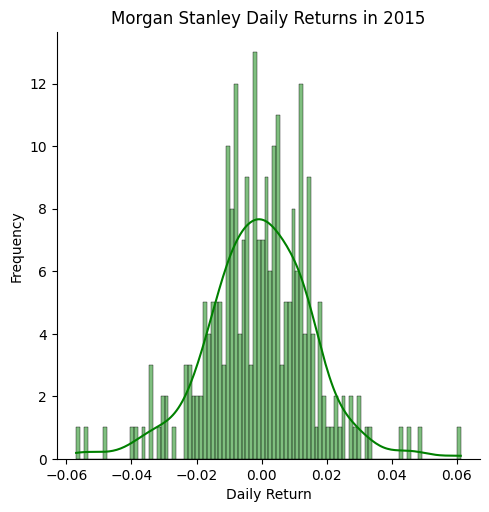

In [24]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='green', bins=100, kde=True)
plt.title('Morgan Stanley Daily Returns in 2015')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

Text(0.6944444444444446, 0.5, 'Frequency')

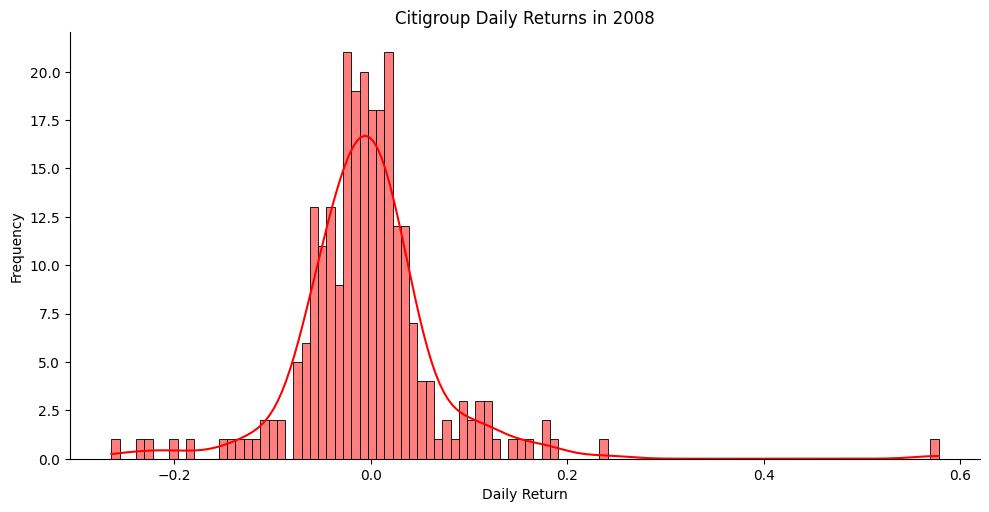

In [25]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'], 
            color='red', 
            bins=100, 
            kde=True,
            aspect=2)

plt.title('Citigroup Daily Returns in 2008')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

Text(0, 0.5, 'Price ($)')

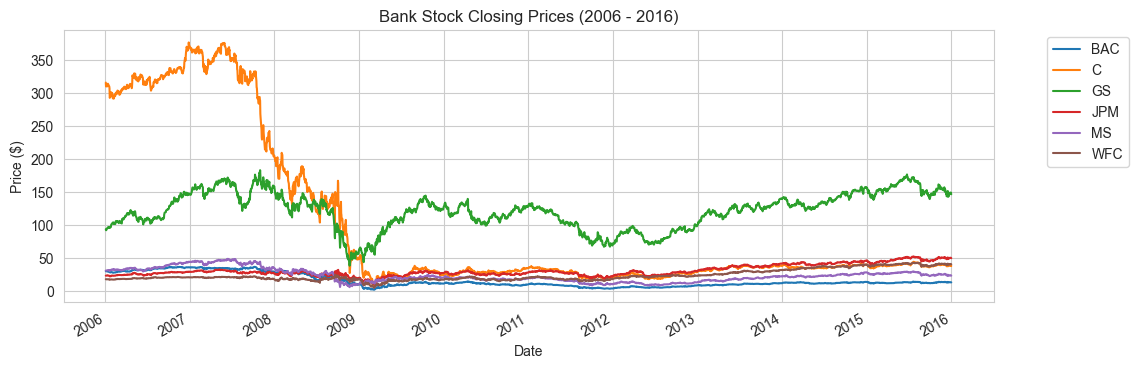

In [31]:
# Now targeting Level 0 because 'Close' is the first level of your MultiIndex
bank_stocks.xs(key='Close', axis=1, level=0).plot(figsize=(12, 4))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Bank Stock Closing Prices (2006 - 2016)')
plt.ylabel('Price ($)')


## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

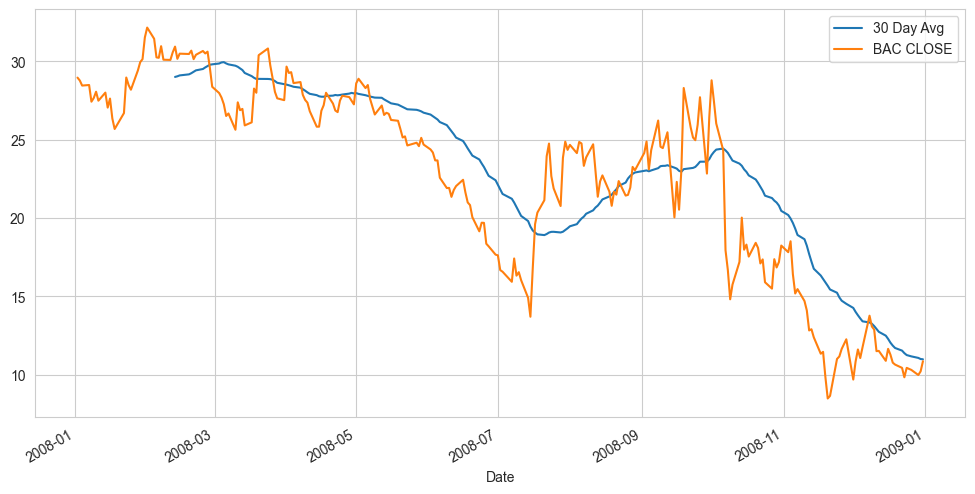

In [32]:
plt.figure(figsize=(12, 6))
bank_stocks['Close']['BAC'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='30 Day Avg')
bank_stocks['Close']['BAC'].loc['2008-01-01':'2008-12-31'].plot(label='BAC CLOSE')
plt.legend()


** Create a heatmap of the correlation between the stocks Close Price.**

Text(0.5, 1.0, 'Correlation Heatmap of Bank Stock Closing Prices')

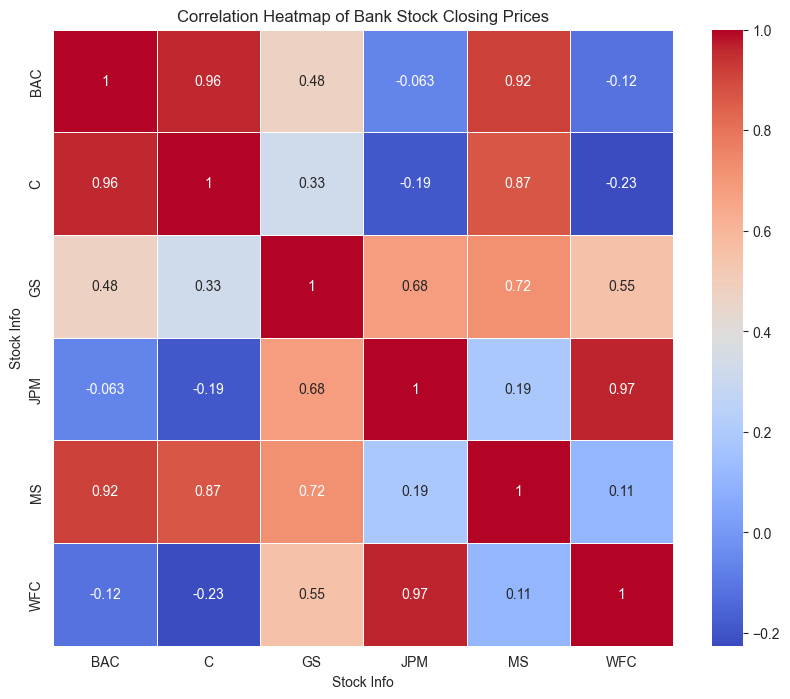

In [34]:

close_corr = bank_stocks.xs(key='Close', axis=1, level=0).corr()


plt.figure(figsize=(10, 8))
sns.heatmap(close_corr, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of Bank Stock Closing Prices')


** Optional: Use seaborn's clustermap to cluster the correlations together:**

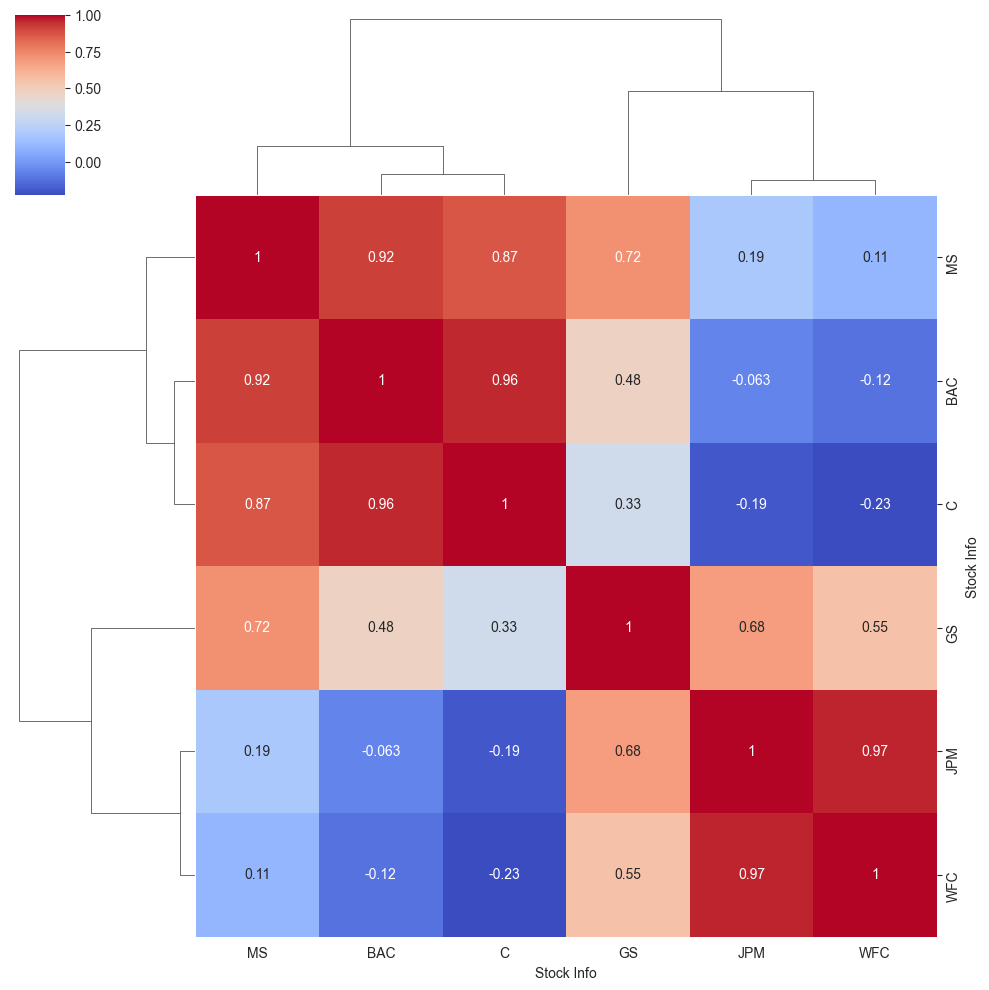

In [35]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level=0).corr(), annot=True, cmap='coolwarm')


# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [38]:
import plotly.graph_objects as go

df_bac = bank_stocks.xs('BAC', axis=1, level=1).loc['2015-01-01':'2016-01-01']

fig = go.Figure(data=[go.Candlestick(x=df_bac.index,
                open=df_bac['Open'], high=df_bac['High'],
                low=df_bac['Low'], close=df_bac['Close'])])
fig.show()

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

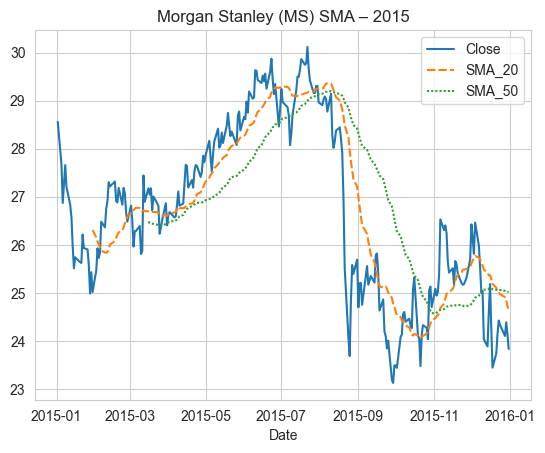

In [49]:
ms_close_2015 = bank_stocks.loc['2015', ('Close', 'MS')]

df = ms_close_2015.to_frame(name='Close')
df['SMA_20'] = df['Close'].rolling(20).mean()
df['SMA_50'] = df['Close'].rolling(50).mean()

sns.lineplot(data=df)
plt.title('Morgan Stanley (MS) SMA – 2015')
plt.show()


**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

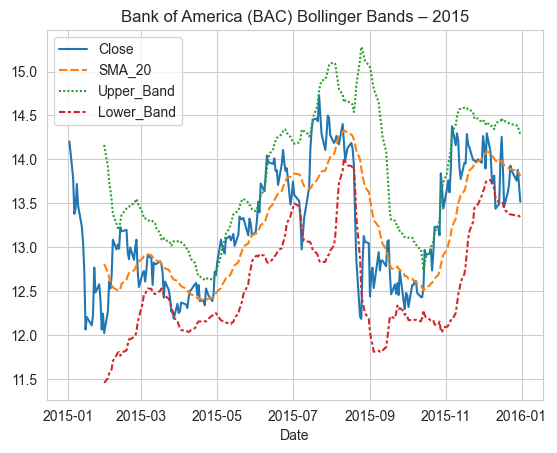

In [51]:
bac_close_2015 = bank_stocks.loc['2015', ('Close', 'BAC')]

df = bac_close_2015.to_frame(name='Close')

# Bollinger Bands (20-day)
df['SMA_20'] = df['Close'].rolling(20).mean()
df['Upper_Band'] = df['SMA_20'] + 2 * df['Close'].rolling(20).std()
df['Lower_Band'] = df['SMA_20'] - 2 * df['Close'].rolling(20).std()

sns.lineplot(data=df[['Close', 'SMA_20', 'Upper_Band', 'Lower_Band']])
plt.title('Bank of America (BAC) Bollinger Bands – 2015')
plt.show()

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.